###Import

In [6]:
!pip install plotly
!pip install
!pip install xgboost
!pip install openpyxl

ERROR: You must give at least one requirement to install (see "pip help install")


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.dates as mdates

pd.set_option('display.max_columns', None)

###Load Production Data

In [8]:
# Using the 'Production' sheet to load production data
production_data_2020 = pd.read_excel("/content/drive/MyDrive/606/606 data/productionandcurtailmentsdata_2020.xlsx", sheet_name="Production")
# Converting all column names to lowercase for consistency and easier referencing
production_data_2020.columns = [feature.lower() for feature in production_data_2020.columns]

In [9]:
#2021
production_data_2021 = pd.read_excel("/content/drive/MyDrive/606/606 data/productionandcurtailmentsdata_2021.xlsx",sheet_name="Production")
production_data_2021.columns = [feature.lower() for feature in production_data_2021.columns]

#2022
production_data_2022 = pd.read_excel("/content/drive/MyDrive/606/606 data/productionandcurtailmentsdata_2022.xlsx",sheet_name="Production")
production_data_2022.columns = [feature.lower() for feature in production_data_2022.columns]

#2023
production_data_2023 = pd.read_excel("/content/drive/MyDrive/606/606 data/productionandcurtailmentsdata_2023.xlsx",sheet_name="Production")
production_data_2023.columns = [feature.lower() for feature in production_data_2023.columns]

#2024
production_data_2024 = pd.read_excel("/content/drive/MyDrive/606/606 data/production-and-curtailments-data-2024.xlsx",sheet_name="Production")
production_data_2024.columns = [feature.lower() for feature in production_data_2024.columns]

#2025
production_data_2025 = pd.read_excel("/content/drive/MyDrive/606/606 data/production-and-curtailments-data-2025.xlsx",sheet_name="Production")
production_data_2025.columns = [feature.lower() for feature in production_data_2025.columns]

###Load California Weather Data

In [75]:
# Load the weather data

# The file contains hourly data for California

weather_data = pd.read_csv("/content/drive/MyDrive/606/606 data/California hourly data 2020-01-01 to 2025-01-31.csv")


###Printing data set

In [11]:
production_data_2025.tail()

,date,hour,interval,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports)
8923,2025-01-31 23:35:00,24,8,23574.427396,0.0,2221.710549,21352.716847,3537.813551,2267.691338,1559.802370,8501.533333,15072.913151,7707.605892,-0.019089
8924,2025-01-31 23:40:00,24,9,23622.768047,0.0,2215.542322,21407.225724,3532.562867,2267.342004,1613.154860,8595.640000,15027.132396,7614.072665,-0.004349
8925,2025-01-31 23:45:00,24,10,23521.024297,0.0,2216.633929,21304.390368,3534.338863,2267.808665,1587.348139,8652.866667,14868.145026,7478.649359,0.012604
8926,2025-01-31 23:50:00,24,11,23524.268906,0.0,2228.079253,21296.189653,3544.425815,2267.421335,1570.208172,8688.906667,14835.398268,7453.342946,-0.036029
8927,2025-01-31 23:55:00,24,12,23421.934609,0.0,2284.143670,21137.790939,3601.043065,2267.690329,1637.415669,8369.720000,15052.231003,7546.081939,-0.016393


In [12]:
# Display the 'weather_data' DataFrame
weather_data.tail()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
44587,califorina,2025-01-31 19:00:00,49.9,48.5,30.1,46.34,0.0,0,NaN,0.0,0.0,12.3,4.3,297.0,1022.3,23.3,21.3,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"SE377,72381023114,74917100479,KTSP,K9L2,723171..."
44588,califorina,2025-01-31 20:00:00,47.5,45.9,30.2,50.81,0.0,0,NaN,0.0,0.0,13.6,4.2,285.0,1022.4,89.6,21.3,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"SE377,72381023114,74917100479,KTSP,K9L2,723171..."
44589,califorina,2025-01-31 21:00:00,48.5,46.4,25.9,41.13,0.0,0,NaN,0.0,0.0,14.5,5.0,313.0,1022.4,43.1,21.3,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"SE377,72381023114,74917100479,KTSP,K9L2,723171..."
44590,califorina,2025-01-31 22:00:00,44.2,44.2,29.2,55.24,0.0,0,NaN,0.0,0.0,15.2,1.9,300.0,1022.9,31.8,21.3,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"SE377,72381023114,74917100479,KTSP,K9L2,723171..."
44591,califorina,2025-01-31 23:00:00,43.0,43.0,27.5,54.02,0.0,0,NaN,0.0,0.0,13.4,2.2,297.0,1022.6,12.9,9.9,0.0,0.0,0,NaN,Clear,clear-night,"SE377,72381023114,74917100479,KTSP,K9L2,723171..."


###EDA On Production Data

In [13]:
production_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105408 entries, 0 to 105407
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            105408 non-null  datetime64[ns]
 1   hour                            105408 non-null  int64         
 2   interval                        105408 non-null  int64         
 3   load                            105408 non-null  float64       
 4   solar                           105408 non-null  float64       
 5   wind                            105408 non-null  float64       
 6   net load                        105408 non-null  float64       
 7   renewables                      105408 non-null  float64       
 8   nuclear                         105408 non-null  float64       
 9   large hydro                     105408 non-null  float64       
 10  imports                         105407 non-null  float64

In [14]:
print("Shape of Production Data 2020",production_data_2020.shape)
print("Shape of Production Data 2021",production_data_2021.shape)
print("Shape of Production Data 2022",production_data_2022.shape)
print("Shape of Production Data 2023",production_data_2023.shape)
print("Shape of Production Data 2024",production_data_2024.shape)
print("Shape of Production Data 2025",production_data_2025.shape)
print("\n Since 2020 and 2024 are leap year there are more records")

Shape of Production Data 2020 (105408, 14)
Shape of Production Data 2021 (105120, 14)
Shape of Production Data 2022 (105120, 14)
Shape of Production Data 2023 (105120, 14)
Shape of Production Data 2024 (105408, 14)
Shape of Production Data 2025 (8928, 14)

 Since 2020 and 2024 are leap year there are more records


In [15]:
# Find the null values in production_data_2020
production_data_2020.isnull().sum()

,0
date,0
hour,0
interval,0
load,0
solar,0
wind,0
net load,0
renewables,0
nuclear,0
large hydro,0


In [16]:
# Calculate the average of 'imports'
average_imports = production_data_2020['imports'].mean()

# Calculate the average of 'load less (generation+imports)'
average_load_less = production_data_2020['load less (generation+imports)'].mean()


In [17]:
print(average_imports,average_load_less)

6417.211838229799 -0.07463717050919713


In [18]:
# Fill the missing value in 'imports'
production_data_2020['imports'] = production_data_2020['imports'].fillna(average_imports)

# Fill the missing value in 'load less (generation+imports)'
production_data_2020['load less (generation+imports)'] = production_data_2020['load less (generation+imports)'].fillna(average_load_less)

In [19]:
# Find the null values in production_data_2020
production_data_2020.isnull().sum()

,0
date,0
hour,0
interval,0
load,0
solar,0
wind,0
net load,0
renewables,0
nuclear,0
large hydro,0


### Merge the Production datasets

In [66]:
# Concatenate the DataFrames
all_production_data = pd.concat([production_data_2020, production_data_2021, production_data_2022, production_data_2023, production_data_2024,production_data_2025], ignore_index=True)

# Display the merged DataFrame
all_production_data.head()

,date,hour,interval,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports)
0,2020-01-01 00:00:00,1,1,22121.306042,0.0,290.128537,21831.177504,1684.108439,2272.914003,1454.382066,8523.626667,13598.950729,8187.546221,-1.271354
1,2020-01-01 00:05:00,1,2,22119.647656,0.0,285.203357,21834.444300,1658.931626,2273.301338,1357.157727,8385.320000,13726.372839,8436.982147,7.954818
2,2020-01-01 00:10:00,1,3,22056.574375,0.0,275.933807,21780.640568,1666.341899,2272.750655,1319.864573,8333.773333,13716.481484,8457.524358,6.319557
3,2020-01-01 00:15:00,1,4,21981.423021,0.0,275.207947,21706.215074,1664.394765,2273.263670,1331.500633,8333.493333,13638.609375,8369.450307,9.320312
4,2020-01-01 00:20:00,1,5,21901.401719,0.0,277.932034,21623.469684,1670.286625,2273.183646,1302.441129,8255.800000,13636.090573,8390.179172,9.511146


In [67]:
print("Shape of Production Data",all_production_data.shape)

Shape of Production Data (535104, 14)


### Sampling Data

In [68]:
# Convert the 'date' column to datetime objects if it's not already
all_production_data['date'] = pd.to_datetime(all_production_data['date'])

# Set 'date' as the index
all_production_data = all_production_data.set_index('date')

# Resample to hourly intervals and sum the values
all_production_data_hourly = all_production_data.resample('h').sum()

# Calculate the correct 'hour' (0 - 23) from the index
all_production_data_hourly['hour'] = all_production_data_hourly.index.hour

# Reset the index to have 'date' as a column again
all_production_data_hourly = all_production_data_hourly.reset_index()

# Drop the 'interval' columns
all_production_data_hourly = all_production_data_hourly.drop(columns=['interval'])

# Display the result
all_production_data_hourly.head()

,date,hour,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports)
0,2020-01-01 00:00:00,0,261642.173073,0.0,3406.967436,258235.205637,20091.520292,27279.731877,15895.241613,99143.546667,162410.879518,99144.385736,87.746888
1,2020-01-01 01:00:00,1,252464.832604,0.0,5967.002946,246497.829658,22649.576156,27273.699994,14712.373468,91953.413333,160451.063841,95815.414224,60.355430
2,2020-01-01 02:00:00,2,245416.002344,0.0,6199.244249,239216.758095,22898.479955,27280.022811,14073.236606,93985.426667,151384.511224,87132.771853,46.064453
3,2020-01-01 03:00:00,3,241363.031667,0.0,5080.579630,236282.452037,21691.987069,27280.588677,14248.185413,94369.893333,146970.820052,83750.058893,22.318281
4,2020-01-01 04:00:00,4,239642.357318,0.0,9443.764928,230198.592389,26065.495828,27262.534627,15167.772388,93689.306667,145981.897747,77486.094904,-28.847096


In [69]:
# Display the resampled DataFrame
all_production_data_hourly.head()

,date,hour,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports)
0,2020-01-01 00:00:00,0,261642.173073,0.0,3406.967436,258235.205637,20091.520292,27279.731877,15895.241613,99143.546667,162410.879518,99144.385736,87.746888
1,2020-01-01 01:00:00,1,252464.832604,0.0,5967.002946,246497.829658,22649.576156,27273.699994,14712.373468,91953.413333,160451.063841,95815.414224,60.355430
2,2020-01-01 02:00:00,2,245416.002344,0.0,6199.244249,239216.758095,22898.479955,27280.022811,14073.236606,93985.426667,151384.511224,87132.771853,46.064453
3,2020-01-01 03:00:00,3,241363.031667,0.0,5080.579630,236282.452037,21691.987069,27280.588677,14248.185413,94369.893333,146970.820052,83750.058893,22.318281
4,2020-01-01 04:00:00,4,239642.357318,0.0,9443.764928,230198.592389,26065.495828,27262.534627,15167.772388,93689.306667,145981.897747,77486.094904,-28.847096


In [70]:
print("Shape of Production Data",all_production_data_hourly.shape)

Shape of Production Data (44592, 13)


In [71]:
# Find the null values in production_data_2021
all_production_data_hourly.isnull().sum()

,0
date,0
hour,0
load,0
solar,0
wind,0
net load,0
renewables,0
nuclear,0
large hydro,0
imports,0


In [72]:
all_production_data_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44592 entries, 0 to 44591
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            44592 non-null  datetime64[ns]
 1   hour                            44592 non-null  int32         
 2   load                            44592 non-null  float64       
 3   solar                           44592 non-null  float64       
 4   wind                            44592 non-null  float64       
 5   net load                        44592 non-null  float64       
 6   renewables                      44592 non-null  float64       
 7   nuclear                         44592 non-null  float64       
 8   large hydro                     44592 non-null  float64       
 9   imports                         44592 non-null  float64       
 10  generation                      44592 non-null  float64       
 11  th

### Weather Data EDA

In [76]:
# Select the desired columns and assign to a  DataFrame
# weather_data = weather_data[['datetime', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy','uvindex']]

weather_data = weather_data[['datetime','temp',	'dew',	'humidity',	'precip',	'snowdepth',	'windgust',	'windspeed',	'winddir',	'sealevelpressure',	'cloudcover',	'visibility',	'solarradiation',	'solarenergy',	'uvindex']]

# Convert the 'datetime' column to datetime objects
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Set 'datetime' as the index
# weather_data = weather_data.set_index('datetime')

# Rename the 'datetime' column in weather_data to 'date'
weather_data = weather_data.rename(columns={'datetime': 'date'})

# Display the new DataFrame
weather_data.head()

<ipython-input-76-bf4b21496039>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


,date,temp,dew,humidity,precip,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2020-01-01 00:00:00,32.0,29.7,91.14,0.0,1.24,7.4,0.9,23.0,1020.4,0.0,9.9,0.0,0.0,0
1,2020-01-01 01:00:00,31.8,29.9,92.58,0.0,1.22,8.3,4.0,315.0,1020.2,0.0,9.9,0.0,0.0,0
2,2020-01-01 02:00:00,30.8,29.3,94.03,0.0,1.21,8.7,4.0,4.0,1021.0,0.0,9.9,0.0,0.0,0
3,2020-01-01 03:00:00,31.1,30.0,95.84,0.0,1.19,7.4,7.1,123.0,1020.3,0.0,9.9,0.0,0.0,0
4,2020-01-01 04:00:00,31.7,30.2,93.95,0.0,1.18,8.3,2.6,307.0,1019.2,16.1,9.9,0.0,0.0,0


In [77]:
# Display the 'weather_data' DataFrame
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44592 entries, 0 to 44591
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              44592 non-null  datetime64[ns]
 1   temp              44592 non-null  float64       
 2   dew               44592 non-null  float64       
 3   humidity          44592 non-null  float64       
 4   precip            44592 non-null  float64       
 5   snowdepth         44592 non-null  float64       
 6   windgust          44434 non-null  float64       
 7   windspeed         44592 non-null  float64       
 8   winddir           44592 non-null  float64       
 9   sealevelpressure  44592 non-null  float64       
 10  cloudcover        44592 non-null  float64       
 11  visibility        44592 non-null  float64       
 12  solarradiation    44592 non-null  float64       
 13  solarenergy       44592 non-null  float64       
 14  uvindex           4459

In [78]:
print("Shape of Weather Data",weather_data.shape)

Shape of Weather Data (44592, 15)


In [79]:
# Find the null values in weather_data
weather_data.isnull().sum()

,0
date,0
temp,0
dew,0
humidity,0
precip,0
snowdepth,0
windgust,158
windspeed,0
winddir,0
sealevelpressure,0


In [80]:
# Calculate the average of 'imports'
average_windgust = weather_data['windgust'].mean()
print(average_windgust)

16.452752396813253


In [81]:
# Fill the missing value in 'windgust'
weather_data['windgust'] = weather_data['windgust'].fillna(average_imports)


In [82]:
# Find the null values in weather_data
weather_data.isnull().sum()

,0
date,0
temp,0
dew,0
humidity,0
precip,0
snowdepth,0
windgust,0
windspeed,0
winddir,0
sealevelpressure,0


###Mearging Production and Weather

In [83]:
# Merge the two DataFrames based on the 'date' column
merged_data = pd.merge(all_production_data_hourly, weather_data, on='date', how='inner')

# Display the merged DataFrame
merged_data.head()

,date,hour,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports),temp,dew,humidity,precip,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2020-01-01 00:00:00,0,261642.173073,0.0,3406.967436,258235.205637,20091.520292,27279.731877,15895.241613,99143.546667,162410.879518,99144.385736,87.746888,32.0,29.7,91.14,0.0,1.24,7.4,0.9,23.0,1020.4,0.0,9.9,0.0,0.0,0
1,2020-01-01 01:00:00,1,252464.832604,0.0,5967.002946,246497.829658,22649.576156,27273.699994,14712.373468,91953.413333,160451.063841,95815.414224,60.355430,31.8,29.9,92.58,0.0,1.22,8.3,4.0,315.0,1020.2,0.0,9.9,0.0,0.0,0
2,2020-01-01 02:00:00,2,245416.002344,0.0,6199.244249,239216.758095,22898.479955,27280.022811,14073.236606,93985.426667,151384.511224,87132.771853,46.064453,30.8,29.3,94.03,0.0,1.21,8.7,4.0,4.0,1021.0,0.0,9.9,0.0,0.0,0
3,2020-01-01 03:00:00,3,241363.031667,0.0,5080.579630,236282.452037,21691.987069,27280.588677,14248.185413,94369.893333,146970.820052,83750.058893,22.318281,31.1,30.0,95.84,0.0,1.19,7.4,7.1,123.0,1020.3,0.0,9.9,0.0,0.0,0
4,2020-01-01 04:00:00,4,239642.357318,0.0,9443.764928,230198.592389,26065.495828,27262.534627,15167.772388,93689.306667,145981.897747,77486.094904,-28.847096,31.7,30.2,93.95,0.0,1.18,8.3,2.6,307.0,1019.2,16.1,9.9,0.0,0.0,0


In [84]:
print("Shape of Weather Data",merged_data.shape)

Shape of Weather Data (44592, 27)


In [85]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44592 entries, 0 to 44591
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            44592 non-null  datetime64[ns]
 1   hour                            44592 non-null  int32         
 2   load                            44592 non-null  float64       
 3   solar                           44592 non-null  float64       
 4   wind                            44592 non-null  float64       
 5   net load                        44592 non-null  float64       
 6   renewables                      44592 non-null  float64       
 7   nuclear                         44592 non-null  float64       
 8   large hydro                     44592 non-null  float64       
 9   imports                         44592 non-null  float64       
 10  generation                      44592 non-null  float64       
 11  th

In [86]:
# Save to CSV
# merged_data.to_csv('merged_data.csv', index=False)


###Graph

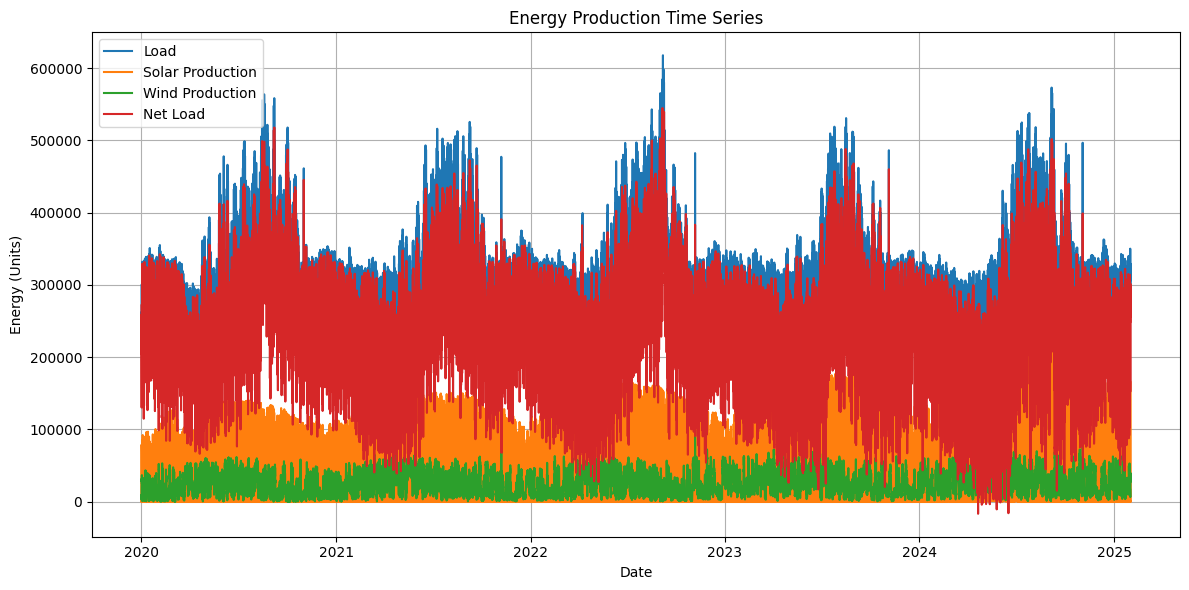

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your merged_data DataFrame is loaded as df
# If reading from CSV, you might do:
df = merged_data.copy()

# Ensure the 'date' column is a datetime type and sort the dataframe by date.
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

# -------------------------
# Graph 1: Energy Production Time Series
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['load'], label='Load')
plt.plot(df['date'], df['solar'], label='Solar Production')
plt.plot(df['date'], df['wind'], label='Wind Production')
plt.plot(df['date'], df['net load'], label='Net Load')
plt.xlabel('Date')
plt.ylabel('Energy (Units)')
plt.title('Energy Production Time Series')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


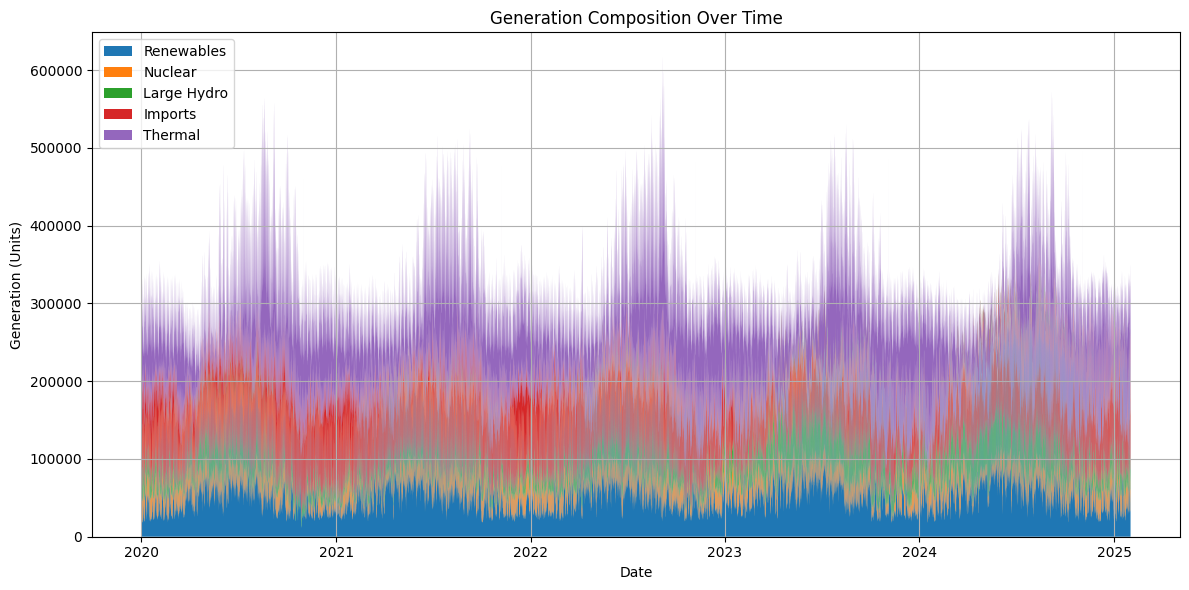

In [89]:
# -------------------------
# Graph 2: Generation Composition Over Time (Stacked Area Chart)
plt.figure(figsize=(12, 6))
plt.stackplot(df['date'],
              df['renewables'],
              df['nuclear'],
              df['large hydro'],
              df['imports'],
              df['thermal'],
              labels=['Renewables', 'Nuclear', 'Large Hydro', 'Imports', 'Thermal'])
plt.xlabel('Date')
plt.ylabel('Generation (Units)')
plt.title('Generation Composition Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

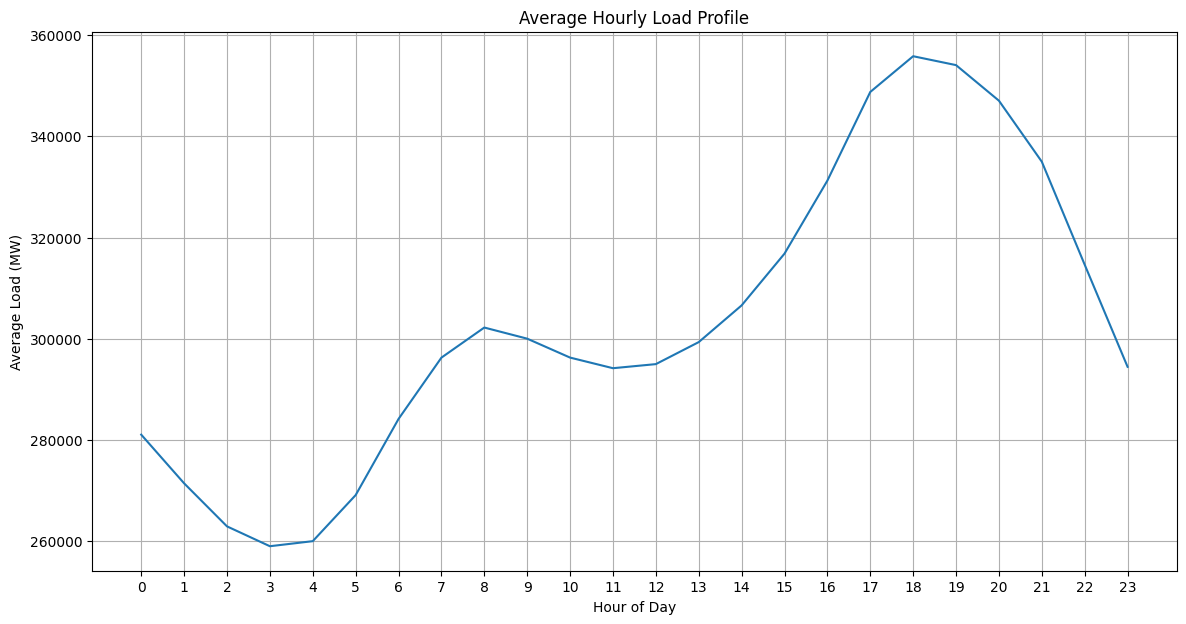

In [90]:
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data.set_index('date', inplace=True)
# Hourly Load Pattern
merged_data['hour'] = merged_data.index.hour
hourly_profile = merged_data.groupby('hour')['load'].mean()
plt.figure(figsize=(14, 7))
hourly_profile.plot(kind='line')
plt.title('Average Hourly Load Profile')
plt.xlabel('Hour of Day')
plt.ylabel('Average Load (MW)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

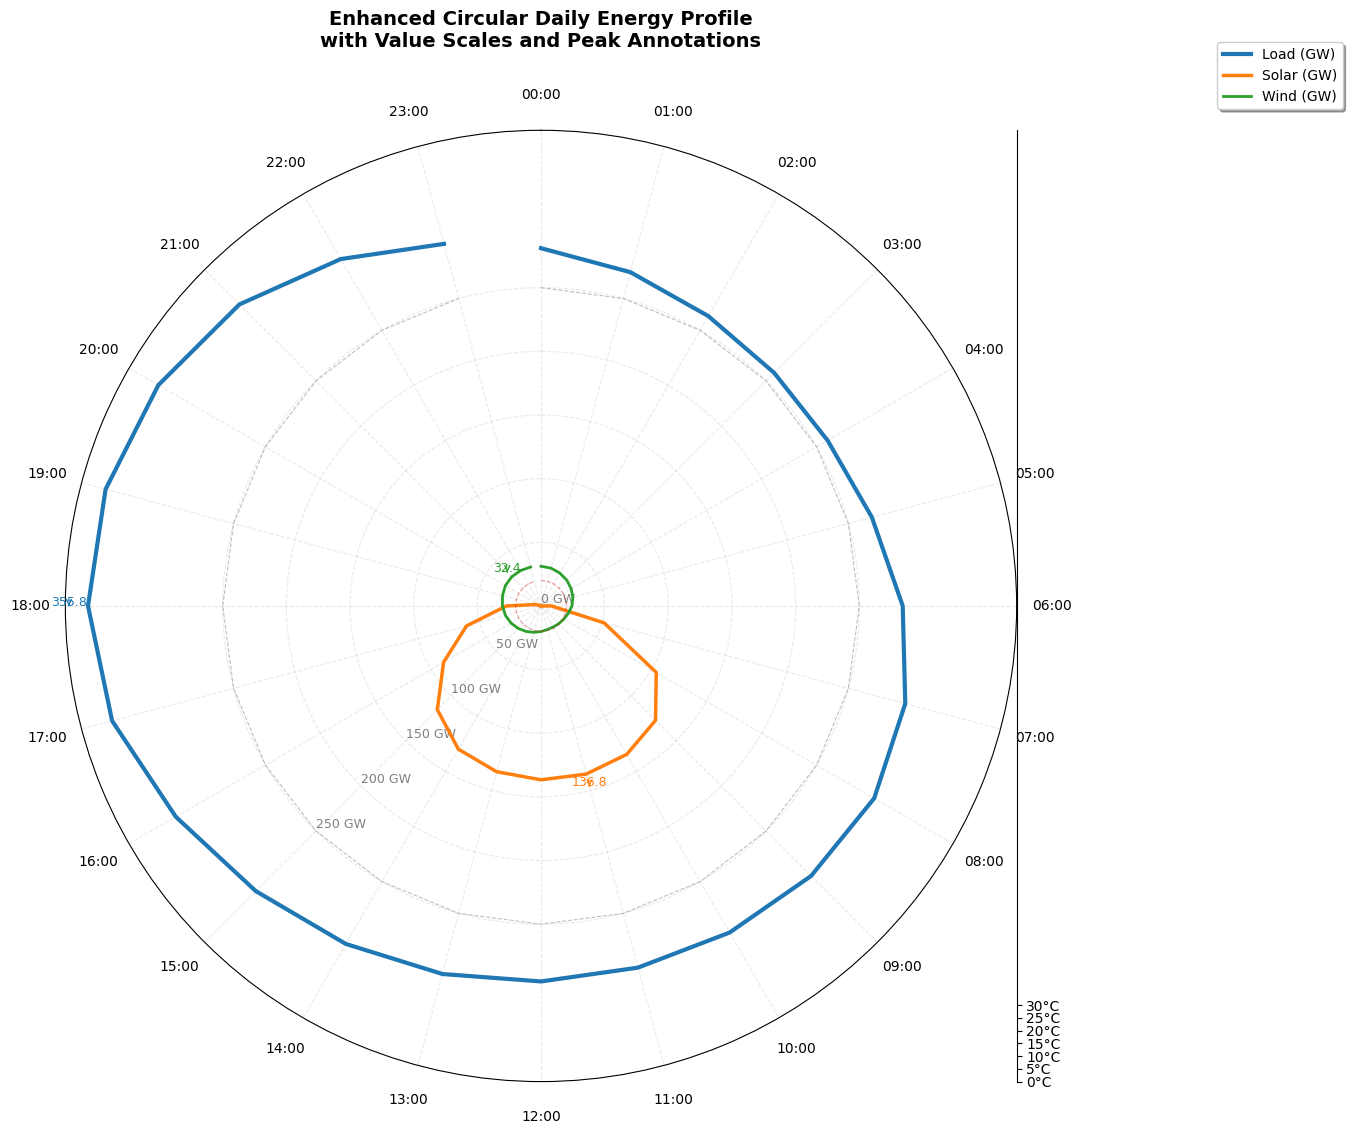

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate hourly averages
# merged_data['hour'] = merged_data.index.hour
hourly_avg = merged_data.groupby('hour').agg({
    'load': 'mean',
    'solar': 'mean',
    'wind': 'mean',
    'temp': 'mean'
}).reset_index()

# Convert to polar coordinates
theta = np.linspace(0, 2*np.pi, 24, endpoint=False)
hours = [f"{h:02d}:00" for h in range(24)]

# Create circular plot
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, polar=True)

# Custom color scheme
colors = {'load': '#1f77b4', 'solar': '#ff7f0e',
         'wind': '#2ca02c', 'temp': '#d62728'}

# Plot elements with value annotations
# 1. Load (outer ring)
load_line = ax.plot(theta, hourly_avg['load']/1000,
                   linewidth=3,
                   color=colors['load'],
                   label='Load (GW)')

# 2. Solar (middle ring)
solar_line = ax.plot(theta, hourly_avg['solar']/1000,
                    linewidth=2.5,
                    color=colors['solar'],
                    label='Solar (GW)')

# 3. Wind (inner ring)
wind_line = ax.plot(theta, hourly_avg['wind']/1000,
                   linewidth=2,
                   color=colors['wind'],
                   label='Wind (GW)')

# # 4. Temperature (filled area)
# temp_fill = ax.fill(theta, hourly_avg['temp'],
#                    alpha=0.2,
#                    color=colors['temp'],
#                    label='Temperature (°C)')

# ========== ENHANCEMENTS ==========
# 1. Add radial value scales
ax.set_rgrids(
    radii=np.arange(0, 300, 50),  # GW scale
    labels=[f'{x} GW' for x in np.arange(0, 300, 50)],
    angle=225,
    color='gray',
    fontsize=9
)

# Add temperature scale on secondary axis
ax_temp = ax.secondary_yaxis('right')
ax_temp.set_yticks(np.arange(0, 35, 5))
ax_temp.set_yticklabels([f'{x}°C' for x in np.arange(0, 35, 5)])
ax_temp.yaxis.label.set_color(colors['temp'])

# 2. Add peak value annotations
def annotate_peaks(data, label, color, offset):
    max_idx = np.argmax(data)
    ax.annotate(f'{data[max_idx]:.1f}',
                xy=(theta[max_idx], data[max_idx] + offset),
                color=color,
                ha='center',
                fontsize=9,
                arrowprops=dict(arrowstyle="->", color=color))

annotate_peaks(hourly_avg['load']/1000, 'Load', colors['load'], 15)
annotate_peaks(hourly_avg['solar']/1000, 'Solar', colors['solar'], 10)
annotate_peaks(hourly_avg['wind']/1000, 'Wind', colors['wind'], 5)

# 3. Improve time labels
ax.set_xticks(theta)
ax.set_xticklabels(hours, fontsize=10)
ax.tick_params(axis='x', pad=15)  # Move labels outward

# 4. Add dual-purpose legend
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.1),
                  frameon=True, shadow=True)
legend.get_frame().set_facecolor('white')

# 5. Add reference lines
ax.plot(theta, [250]*24, '--', color='gray', alpha=0.5, lw=0.8)  # 250 GW reference
ax.plot(theta, [20]*24, '--', color=colors['temp'], alpha=0.5, lw=0.8)  # 20°C reference

# Final styling
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.grid(color='lightgray', alpha=0.5, linestyle='--')
plt.title('Enhanced Circular Daily Energy Profile\nwith Value Scales and Peak Annotations',
         pad=60,
         fontsize=14,
         fontweight='bold')

plt.tight_layout()
plt.show()

### Correlation Matrix

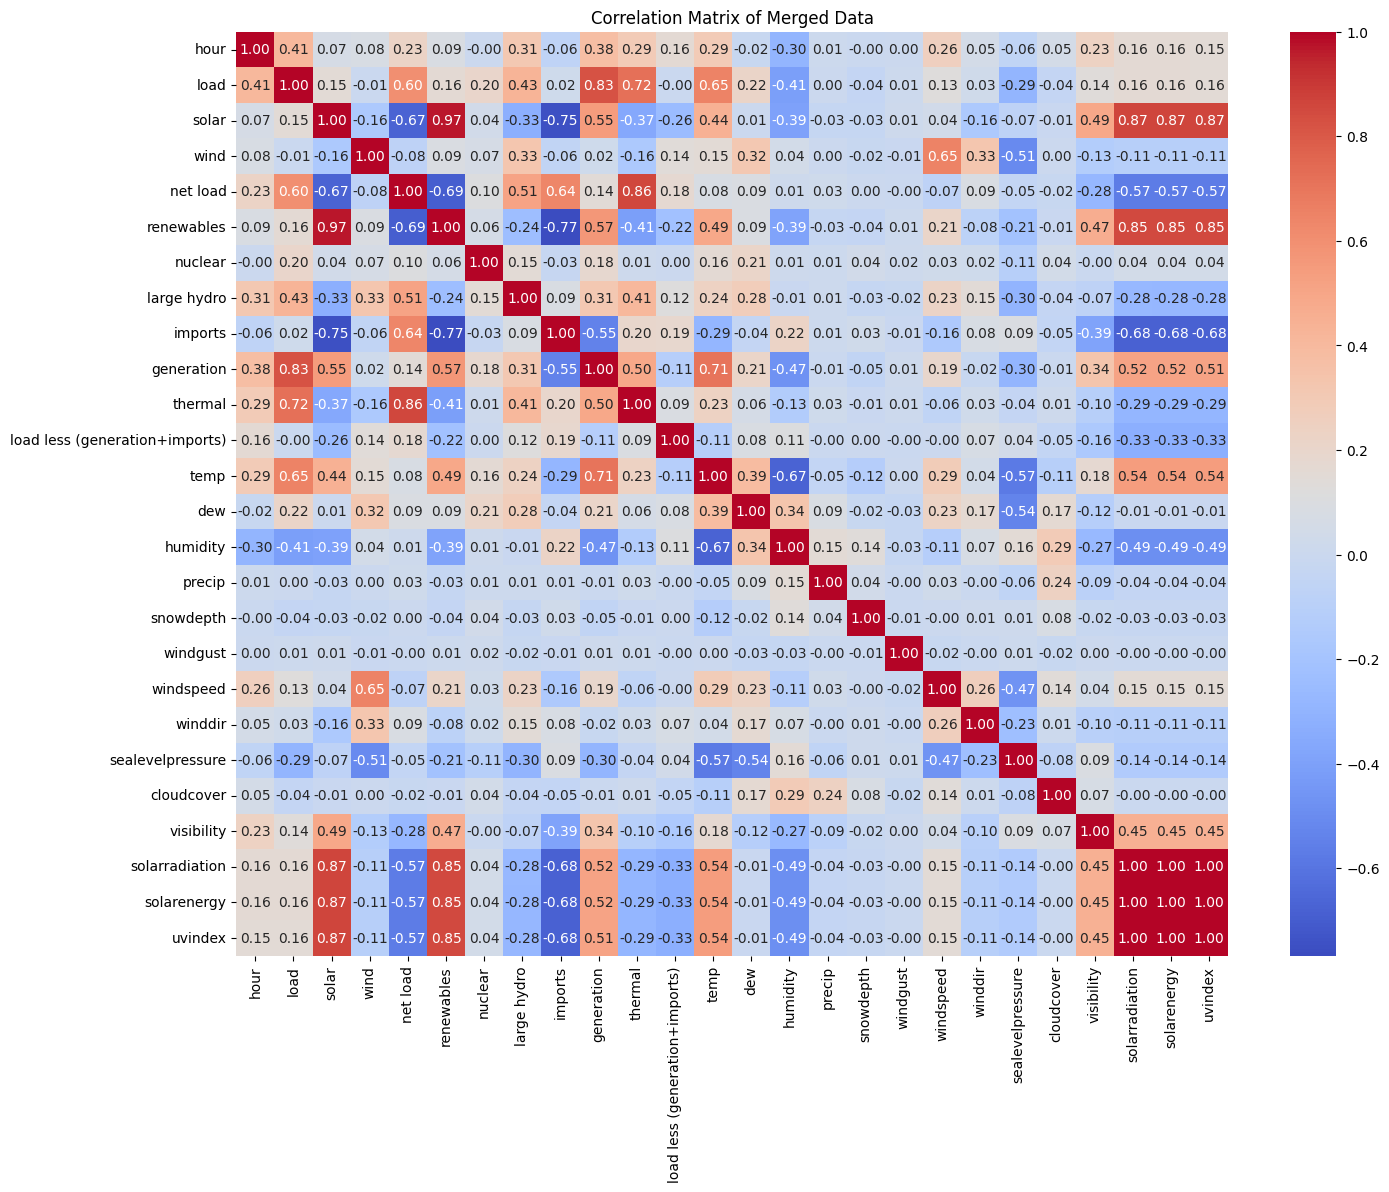

In [94]:

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Merged Data')
plt.show()

hour – Captures the daily load pattern.

temp – Kept as required; represents the main temperature effect.

humidity – Provides complementary moisture information (kept instead of dew).

solarenergy – Serves as the representative of solar-related features.

###Modelling

In [95]:
import pandas as pd
data = pd.read_csv("/content/merged_data.csv")


#### Feature Selection & Preparation

In [99]:
# ---------------------------------
# Feature Selection & Preparation
# ---------------------------------
# Based on our correlation and multicollinearity analysis,

features = ['hour','temp', 'humidity', 'solarenergy']
target = 'load'

X = data[features]
y = data[target]

# Split the dataset into training and testing (70%-30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


In [100]:
# ---------------------------------
# Utility: Function to plot Actual vs Predicted
# ---------------------------------
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_actual, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_pred, alpha=0.5)
    # Plot the ideal 45-degree line
    min_val, max_val = min(y_actual.min(), y_pred.min()), max(y_actual.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.xlabel("Actual Load")
    plt.ylabel("Predicted Load")
    plt.title(title)
    plt.show()

Linear Regression:
Train R²: 0.5356207075833436
Test R²: 0.5222781055855588
Train MAE: 30571.186828655023
Test MAE: 30822.446420959157
--------------------------------------------------


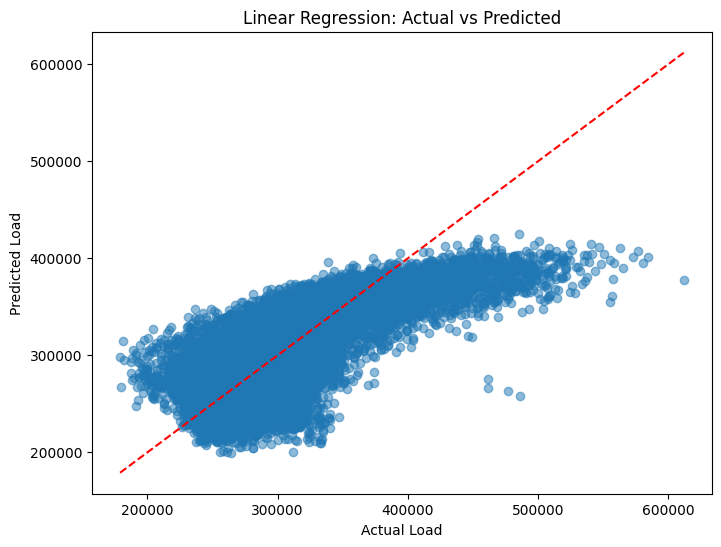

In [101]:
# ---------------------------------
# 1. Linear Regression Model
# ---------------------------------
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
pipe_lr.fit(X_train, y_train)

y_pred_train_lr = pipe_lr.predict(X_train)
y_pred_test_lr = pipe_lr.predict(X_test)

print("Linear Regression:")
print("Train R²:", r2_score(y_train, y_pred_train_lr))
print("Test R²:", r2_score(y_test, y_pred_test_lr))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train_lr))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test_lr))
print("-" * 50)
plot_actual_vs_predicted(y_test, y_pred_test_lr, "Linear Regression: Actual vs Predicted")


Polynomial Regression (Degree 2):
Train R²: 0.7560984265594239
Test R²: 0.7467568791237276
Train MAE: 21923.07856810079
Test MAE: 22191.03325873986
--------------------------------------------------


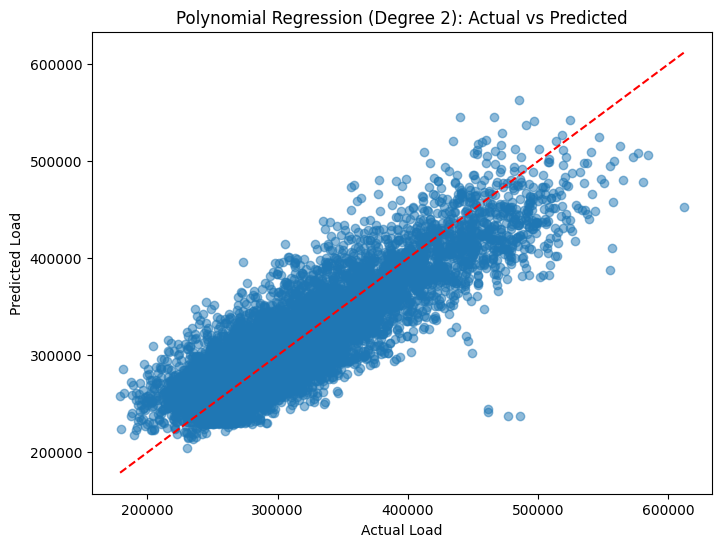

In [102]:
# ---------------------------------
# 2. Polynomial Regression (Degree 2)
# ---------------------------------
from sklearn.preprocessing import PolynomialFeatures

pipe_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr', LinearRegression())
])
pipe_poly.fit(X_train, y_train)

y_pred_train_poly = pipe_poly.predict(X_train)
y_pred_test_poly = pipe_poly.predict(X_test)

print("Polynomial Regression (Degree 2):")
print("Train R²:", r2_score(y_train, y_pred_train_poly))
print("Test R²:", r2_score(y_test, y_pred_test_poly))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train_poly))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test_poly))
print("-" * 50)
plot_actual_vs_predicted(y_test, y_pred_test_poly, "Polynomial Regression (Degree 2): Actual vs Predicted")


Decision Tree Regression (Tuned):
Best Params: {'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 15}
Train R²: 0.8205529728233024
Test R²: 0.7855778516713723
Train MAE: 18034.15683122083
Test MAE: 19388.68287418046
--------------------------------------------------


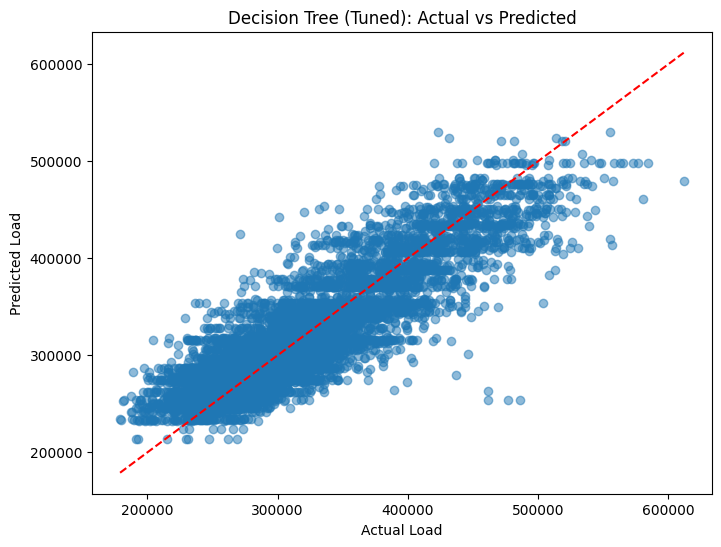

In [103]:
# ---------------------------------
# 3. Decision Tree Regression with Hyperparameter Tuning
# ---------------------------------
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [5, 7, 9, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}

dt = DecisionTreeRegressor(random_state=3)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
y_pred_train_dt = best_dt.predict(X_train)
y_pred_test_dt = best_dt.predict(X_test)

print("Decision Tree Regression (Tuned):")
print("Best Params:", grid_dt.best_params_)
print("Train R²:", r2_score(y_train, y_pred_train_dt))
print("Test R²:", r2_score(y_test, y_pred_test_dt))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train_dt))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test_dt))
print("-" * 50)
plot_actual_vs_predicted(y_test, y_pred_test_dt, "Decision Tree (Tuned): Actual vs Predicted")


Bagging Regressor (Tuned):
Best Params: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200}
Train R²: 0.9283571698651217
Test R²: 0.8012831333459143
Train MAE: 11353.93289347277
Test MAE: 18789.168772703277
--------------------------------------------------


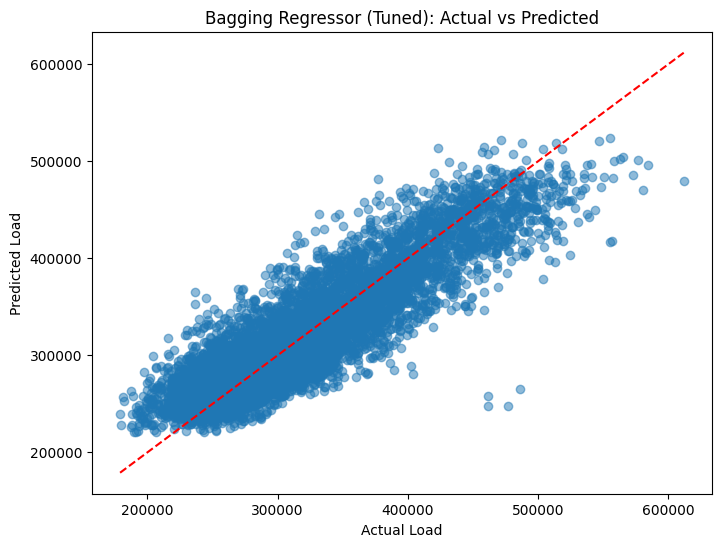

In [104]:
# ---------------------------------
# 4. Bagging Regressor with Hyperparameter Tuning
# ---------------------------------
from sklearn.ensemble import BaggingRegressor

param_grid_bag = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=3), random_state=3)
grid_bag = GridSearchCV(bag, param_grid_bag, cv=5, scoring='r2', n_jobs=-1)
grid_bag.fit(X_train, y_train)

best_bag = grid_bag.best_estimator_
y_pred_train_bag = best_bag.predict(X_train)
y_pred_test_bag = best_bag.predict(X_test)

print("Bagging Regressor (Tuned):")
print("Best Params:", grid_bag.best_params_)
print("Train R²:", r2_score(y_train, y_pred_train_bag))
print("Test R²:", r2_score(y_test, y_pred_test_bag))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train_bag))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test_bag))
print("-" * 50)
plot_actual_vs_predicted(y_test, y_pred_test_bag, "Bagging Regressor (Tuned): Actual vs Predicted")


Stacking Regressor:
Train R²: 0.9061362964681378
Test R²: 0.8038494990210401
Train MAE: 13067.586029136619
Test MAE: 18683.849836321308
--------------------------------------------------


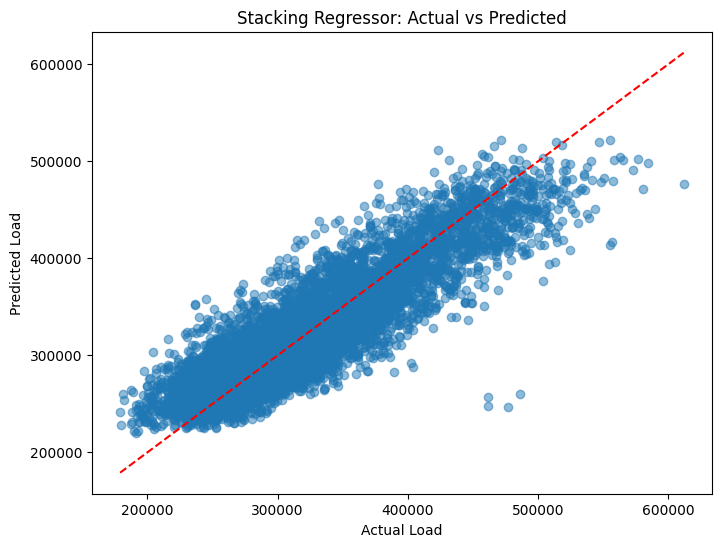

In [105]:
# ---------------------------------
# 5. Stacking Ensemble
# ---------------------------------
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

estimators = [
    ('lr', Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ])),
    ('poly', Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('lr', LinearRegression())
    ])),
    ('dt', best_dt),
    ('bag', best_bag)
]

stack_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(),
    cv=5,
    n_jobs=-1
)
stack_reg.fit(X_train, y_train)

y_pred_train_stack = stack_reg.predict(X_train)
y_pred_test_stack = stack_reg.predict(X_test)

print("Stacking Regressor:")
print("Train R²:", r2_score(y_train, y_pred_train_stack))
print("Test R²:", r2_score(y_test, y_pred_test_stack))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train_stack))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test_stack))
print("-" * 50)
plot_actual_vs_predicted(y_test, y_pred_test_stack, "Stacking Regressor: Actual vs Predicted")


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Extreme Gradient Boosting Regressor (XGBoost):
Best Params: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 100}
Train R²: 0.8519092078689027
Test R²: 0.8093737329735274
Train MAE: 16442.814767714473
Test MAE: 18363.661756931822
--------------------------------------------------


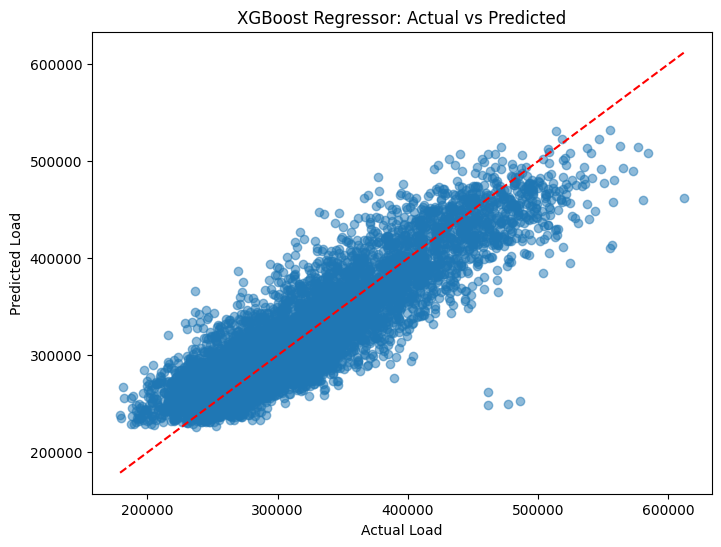

In [106]:
# ---------------------------------
# 6. Extreme Gradient Boosting Regressor (XGBoost)
# ---------------------------------
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Build a pipeline with scaling and XGBRegressor
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(random_state=3, objective='reg:squarederror'))
])

param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
y_pred_train_xgb = best_xgb.predict(X_train)
y_pred_test_xgb = best_xgb.predict(X_test)

print("Extreme Gradient Boosting Regressor (XGBoost):")
print("Best Params:", grid_xgb.best_params_)
print("Train R²:", r2_score(y_train, y_pred_train_xgb))
print("Test R²:", r2_score(y_test, y_pred_test_xgb))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train_xgb))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test_xgb))
print("-" * 50)
plot_actual_vs_predicted(y_test, y_pred_test_xgb, "XGBoost Regressor: Actual vs Predicted")

In [107]:
!pip install neuralprophet


In [108]:
!pip install prophet

In [ ]:
import os
os.kill(os.getpid(), 9)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpiw4u7_s8/zqw9s2yc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiw4u7_s8/fa36ehvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15109', 'data', 'file=/tmp/tmpiw4u7_s8/zqw9s2yc.json', 'init=/tmp/tmpiw4u7_s8/fa36ehvg.json', 'output', 'file=/tmp/tmpiw4u7_s8/prophet_model5ketrvxw/prophet_model-20250401014827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:48:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Model Performance:
MAE: 16653.93
RMSE: 19718.95
MAPE: 5.61%


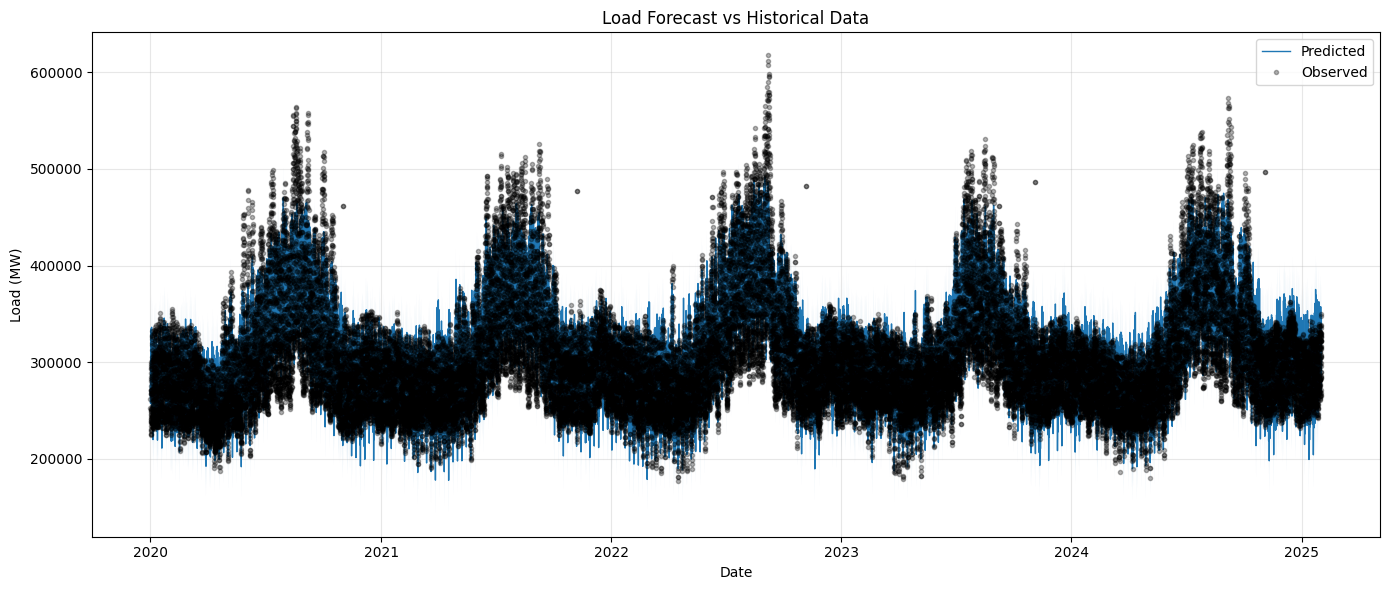

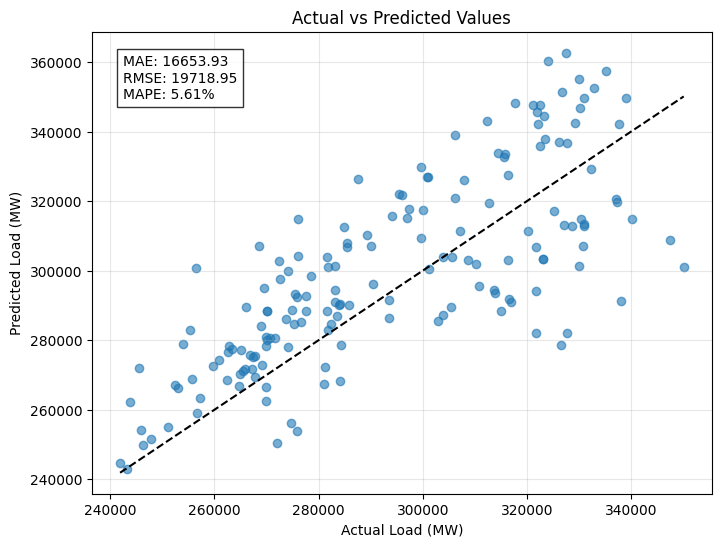

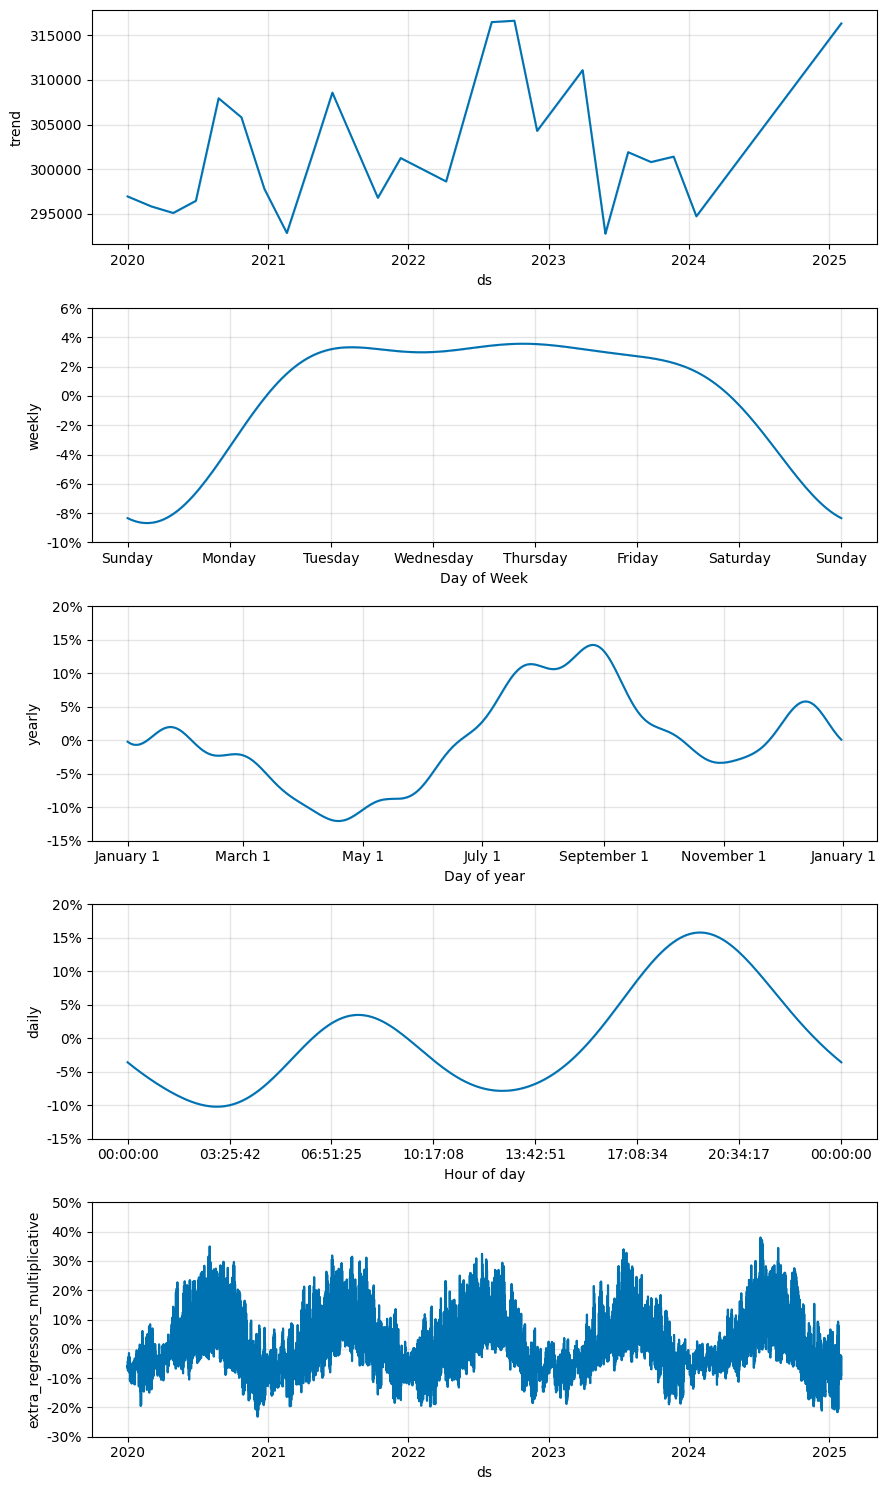

In [110]:
### Prophet
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# 1. Load and preprocess data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    df = df.ffill()
    return df

# 2. Prepare Prophet dataframe
def prepare_prophet_data(df):
    prophet_df = df[['date', 'load', 'temp', 'dew', 'humidity', 'precip', 'windspeed']]
    prophet_df.columns = ['ds', 'y', 'temp', 'dew', 'humidity', 'precip', 'windspeed']
    return prophet_df

# 3. Generate future weather data
def generate_future_weather(last_date, df, periods=168):
    future_dates = pd.date_range(
        start=last_date + pd.Timedelta(hours=1),
        periods=periods,
        freq='h'
    )

    last_valid = df[['temp', 'dew', 'humidity', 'precip', 'windspeed']].ffill().iloc[-1]

    return pd.DataFrame({
        'ds': future_dates,
        'temp': last_valid['temp'],
        'dew': last_valid['dew'],
        'humidity': last_valid['humidity'],
        'precip': last_valid['precip'],
        'windspeed': last_valid['windspeed']
    })

# 4. Prepare future data
def prepare_future_data(future_df, historical_df):
    # Merge historical regressors
    historical_regressors = historical_df[['ds', 'temp', 'dew', 'humidity', 'precip', 'windspeed']]
    merged = future_df.merge(historical_regressors, on='ds', how='left')

    # Add future weather
    future_weather = generate_future_weather(historical_df['ds'].iloc[-1], historical_df)
    merged.update(future_weather.set_index('ds'))

    # Forward-fill remaining NaNs
    merged[['temp', 'dew', 'humidity', 'precip', 'windspeed']] = merged[
        ['temp', 'dew', 'humidity', 'precip', 'windspeed']
    ].ffill()

    return merged

# 5. Create Prophet model
def create_prophet_model():
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10.0
    )

    for regressor in ['temp', 'dew', 'humidity', 'precip', 'windspeed']:
        model.add_regressor(regressor)

    return model

# 6. Visualization functions
def plot_enhanced_forecast(forecast, history=None):
    plt.figure(figsize=(14, 6))
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', lw=1)
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2)
    if history is not None:
        plt.plot(history['ds'], history['y'], 'k.', label='Observed', alpha=0.3)
    plt.title('Load Forecast vs Historical Data')
    plt.xlabel('Date')
    plt.ylabel('Load (MW)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()

def plot_accuracy(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Load (MW)')
    plt.ylabel('Predicted Load (MW)')
    plt.grid(alpha=0.3)

    metrics = f'MAE: {mean_absolute_error(y_true, y_pred):.2f}\n' \
              f'RMSE: {mean_squared_error(y_true, y_pred)**0.5:.2f}\n' \
              f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)*100:.2f}%'
    plt.text(0.05, 0.95, metrics, transform=plt.gca().transAxes,
             va='top', ha='left', bbox=dict(facecolor='white', alpha=0.8))

if __name__ == "__main__":
    # Load data
    df = load_data('/content/merged_data.csv')  # Replace with actual file path
    prophet_df = prepare_prophet_data(df)

    # Split data
    train_df = prophet_df[:-168]
    test_df = prophet_df[-168:]

    # Create and fit model
    model = create_prophet_model()
    model.fit(train_df)

    # Prepare future data
    future = model.make_future_dataframe(periods=168, freq='h')
    future = prepare_future_data(future, prophet_df)

    # Validate data
    if future[['temp', 'dew', 'humidity', 'precip', 'windspeed']].isnull().any().any():
        raise ValueError("NaN values in future data")

    # Generate forecast
    forecast = model.predict(future)

    # Calculate metrics
    y_true = test_df['y'].values
    y_pred = forecast.iloc[-168:]['yhat'].values

    print("\nModel Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred)**0.5:.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_true, y_pred)*100:.2f}%")

    # Plot results
    plot_enhanced_forecast(forecast, prophet_df)
    plot_accuracy(y_true, y_pred)
    model.plot_components(forecast)
    plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpiw4u7_s8/yh0k3nr6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiw4u7_s8/2vft86n1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13384', 'data', 'file=/tmp/tmpiw4u7_s8/yh0k3nr6.json', 'init=/tmp/tmpiw4u7_s8/2vft86n1.json', 'output', 'file=/tmp/tmpiw4u7_s8/prophet_modelcl8ba2hx/prophet_model-20250401014912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:49:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


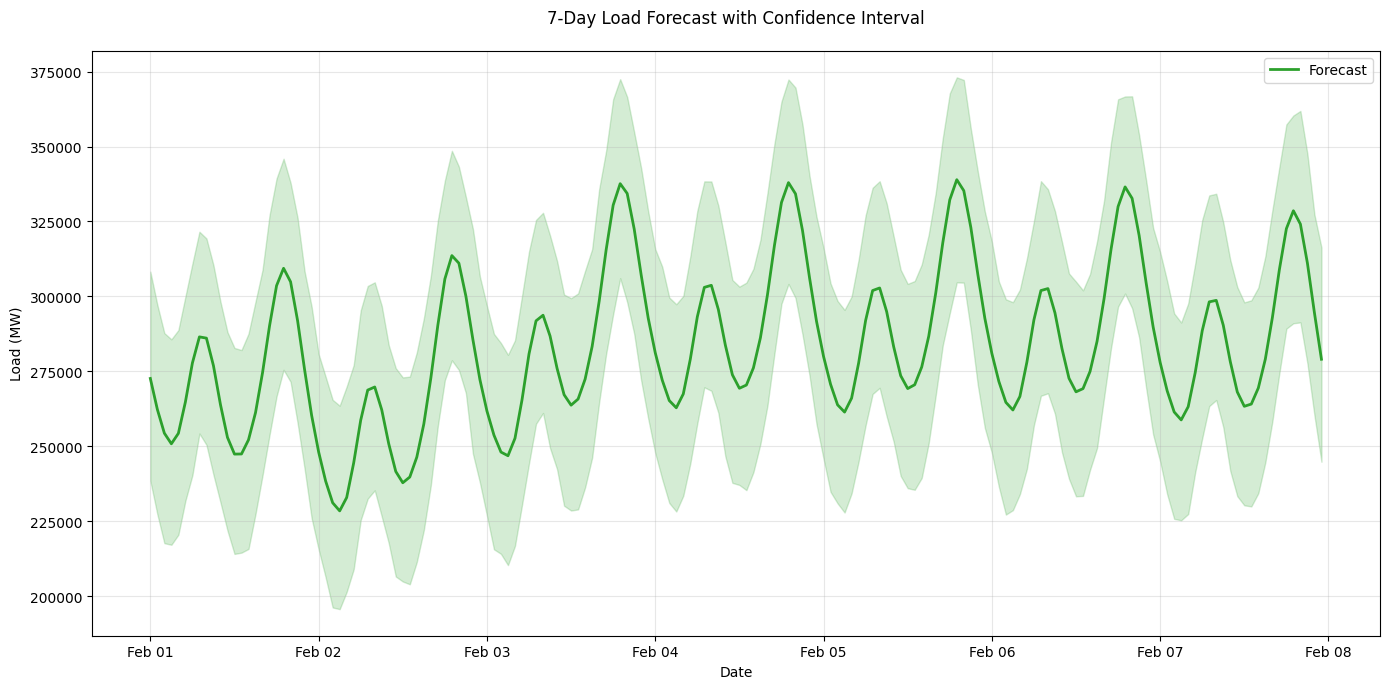

In [111]:
###7-Day Load Forecast
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# 1. Enhanced data loading with validation
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')

    # Forward-fill all columns
    df = df.ffill()

    # Validate no NaNs remain
    if df[['temp', 'humidity']].isnull().any().any():
        raise ValueError("NaN values in historical weather data")

    return df

# 2. Future weather generation with NaN protection
def generate_future_weather(last_date, df, periods=168):
    future_dates = pd.date_range(
        start=last_date + pd.Timedelta(hours=1),
        periods=periods,
        freq='h'
    )

    # Get last valid values with forward-fill
    last_temp = df['temp'].ffill().iloc[-1]
    last_humidity = df['humidity'].ffill().iloc[-1]

    return pd.DataFrame({
        'ds': future_dates,
        'temp': [last_temp] * periods,
        'humidity': [last_humidity] * periods
    })

# 3. Future data preparation with NaN checks
def prepare_future_data(model, historical_df, periods=168):
    # Generate base future dataframe
    future = model.make_future_dataframe(periods=periods, freq='h')

    # Merge historical weather data
    historical_weather = historical_df[['ds', 'temp', 'humidity']]
    future = future.merge(historical_weather, on='ds', how='left')

    # Add future weather predictions
    future_weather = generate_future_weather(
        historical_df['ds'].iloc[-1],
        historical_df,
        periods=periods
    )

    # Update future dataframe
    future.update(future_weather.set_index('ds'))

    # Final forward-fill
    future[['temp', 'humidity']] = future[['temp', 'humidity']].ffill()

    return future

# 4. Main execution flow
if __name__ == "__main__":
    # Load and validate data
    df = load_data('/content/merged_data.csv')
    prophet_df = df[['date', 'load', 'temp', 'humidity']].rename(
        columns={'date': 'ds', 'load': 'y'}
    )

    # Create and fit model
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True
    )
    model.add_regressor('temp')
    model.add_regressor('humidity')
    model.fit(prophet_df)

    # Prepare future data
    future = prepare_future_data(model, prophet_df, periods=168)

    # Final validation
    if future[['temp', 'humidity']].isnull().any().any():
        raise ValueError("NaN values in future data")

    # Generate forecast
    forecast = model.predict(future)

    # Plot 7-day forecast
    plt.figure(figsize=(14, 7))
    forecast_7days = forecast[forecast['ds'] > prophet_df['ds'].max()]

    plt.plot(forecast_7days['ds'], forecast_7days['yhat'],
             color='#2ca02c', lw=2, label='Forecast')
    plt.fill_between(forecast_7days['ds'],
                     forecast_7days['yhat_lower'],
                     forecast_7days['yhat_upper'],
                     color='#2ca02c', alpha=0.2)

    plt.title('7-Day Load Forecast with Confidence Interval', pad=20)
    plt.xlabel('Date')
    plt.ylabel('Load (MW)')
    plt.gca().xaxis.set_major_formatter(DateFormatter('%b %d'))
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
forecast_7days

,date,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,...,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2020-01-01 00:00:00,261642.173073,0.0,3406.967436,258235.205637,20091.520292,27279.731877,15895.241613,99143.546667,162410.879518,...,1.24,7.4,0.9,23.0,1020.4,0.0,9.9,0.0,0.0,0
1,2020-01-01 01:00:00,252464.832604,0.0,5967.002946,246497.829658,22649.576156,27273.699994,14712.373468,91953.413333,160451.063841,...,1.22,8.3,4.0,315.0,1020.2,0.0,9.9,0.0,0.0,0
2,2020-01-01 02:00:00,245416.002344,0.0,6199.244249,239216.758095,22898.479955,27280.022811,14073.236606,93985.426667,151384.511224,...,1.21,8.7,4.0,4.0,1021.0,0.0,9.9,0.0,0.0,0
3,2020-01-01 03:00:00,241363.031667,0.0,5080.579630,236282.452037,21691.987069,27280.588677,14248.185413,94369.893333,146970.820052,...,1.19,7.4,7.1,123.0,1020.3,0.0,9.9,0.0,0.0,0
4,2020-01-01 04:00:00,239642.357318,0.0,9443.764928,230198.592389,26065.495828,27262.534627,15167.772388,93689.306667,145981.897747,...,1.18,8.3,2.6,307.0,1019.2,16.1,9.9,0.0,0.0,0
